<a href="https://colab.research.google.com/github/kwankoravich/COVID-19-Adverse-Event-Bayesian-Network/blob/main/Covid_19_Vaccine_Johnson_old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clean the data

In [ ]:
!gdown --id 1jKwWBl1boB1Mc6AObG6m5mMd9fw-Pd1X

Downloading...
From: https://drive.google.com/uc?id=1jKwWBl1boB1Mc6AObG6m5mMd9fw-Pd1X
To: /content/covid-19_vaccine_Jonhnson.csv
100% 100k/100k [00:00<00:00, 30.8MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
df = pd.read_csv('covid-19_vaccine_Jonhnson.csv', index_col ="VAERS ID")
df.head()

VAERS ID Code          Age  ... Symptoms Code Vaccine Manufacturer 
VAERS ID                              ...                                    
1093939-1     1093939-1    80+ years  ...      10011906                   J&J
1100865-1     1100865-1  65-79 years  ...      10011906                   J&J
1102572-1     1102572-1    80+ years  ...      10011906                   J&J
1102815-1     1102815-1    80+ years  ...      10064530                   J&J
1102815-1     1102815-1    80+ years  ...      10005635                   J&J

[5 rows x 8 columns]

Check the VAERS ID and age is uniquely associated in the dataset

In [ ]:
len(set(df['VAERS ID Code']))

203

Grouping the same symptoms

In [ ]:
#df['Symptoms'] = df['Symptoms'].replace(['SARS-COV-2 TEST POSITIVE'], 'COVID-19')
#df['Symptoms'] = df['Symptoms'].replace(['ASTHENIA'], 'FATIGUE')
#df['Symptoms'] = df['Symptoms'].replace(['RESPIRATORY FAILURE'], 'HYPOXIA')
#df['Symptoms'] = df['Symptoms'].replace(['SUDDEN DEATH'], 'DEATH')
#df['Symptoms'] = df['Symptoms'].replace(['DECREASED APPETITE'], 'HYPOPHAGIA')
#df['Symptoms'] = df['Symptoms'].replace(['COVID-19 PNEUMONIA', 'PNEUMONIA ASPIRATION', 'ATYPICAL PNEUMONIA'], 'PNEUMONIA')
#df['Symptoms'] = df['Symptoms'].replace(['PRODUCTIVE COUGH'], 'COUGH')
#df['Symptoms'] = df['Symptoms'].replace(['FEELING ABNORMAL', 'FEELING HOT', 'FEELING COLD', 'MALAISE'], 'ILLNESS')
#df['Symptoms'] = df['Symptoms'].replace(['INTENSIVE CARE', 'INTENSIVE CARE UNIT ACQUIRED WEAKNESS', 'COMA SCALE', 'COMA SCALE ABNORMA'], 'COMA')
#df['Symptoms'] = df['Symptoms'].replace(['VERTIGO'], 'DIZZINESS')

Deleting irrelevant data

In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)
df['Symptoms'].value_counts()

DEATH                                              166
DYSPNOEA                                            31
UNRESPONSIVE TO STIMULI                             24
SARS-COV-2 TEST POSITIVE                            22
CARDIAC ARREST                                      20
MALAISE                                             20
COVID-19                                            20
ENDOTRACHEAL INTUBATION                             19
PYREXIA                                             18
HEADACHE                                            18
CONDITION AGGRAVATED                                16
RESUSCITATION                                       15
FATIGUE                                             15
NAUSEA                                              15
INTENSIVE CARE                                      14
ASTHENIA                                            13
VOMITING                                            13
COMPUTERISED TOMOGRAM HEAD ABNORMAL                 12
CHILLS    

In [ ]:
g = df.groupby(['VAERS ID Code', 'Age'])

In [ ]:
g.count()

Age Code  Sex  ...  Symptoms Code  Vaccine Manufacturer 
VAERS ID Code Age                         ...                                      
1093939-1     80+ years           1    1  ...              1                      1
1100865-1     65-79 years         1    1  ...              1                      1
1102572-1     80+ years           1    1  ...              1                      1
1102815-1     80+ years          14   14  ...             14                     14
1103106-1     80+ years           2    2  ...              2                      2
1103748-1     65-79 years         2    2  ...              2                      2
1104671-1     30-39 years         5    5  ...              5                      5
1106737-1     80+ years           3    3  ...              3                      3
1110099-1     65-79 years         2    2  ...              2                      2
1111699-1     65-79 years         7    7  ...              7                      7
1112122-1     40-49 years         6    6  ...              6                      6
1112701-1     65-79 years         1    1  ...              1                      1
1114806-1     40-49 years        16   16  ...             16                     16
1124688-1     80+ years           1    1  ...              1                      1
1125903-1     80+ years           1    1  ...              1                      1
1134651-1     60-64 years         2    2  ...              2                      2
1134697-1     50-59 years         1    1  ...              1                      1
1134819-1     50-59 years        12   12  ...             12                     12
1139186-1     80+ years           1    1  ...              1                      1
1142078-1     80+ years          16   16  ...             16                     16
1142965-1     65-79 years         2    2  ...              2                      2
1143912-1     65-79 years        31   31  ...             31                     31
1146768-1     65-79 years         1    1  ...              1                      1
1154639-1     30-39 years         2    2  ...              2                      2
1155893-1     60-64 years         4    4  ...              4                      4
1160227-1     80+ years           1    1  ...              1                      1
1165154-1     40-49 years         1    1  ...              1                      1
1167886-1     65-79 years        21   21  ...             21                     21
1168142-1     65-79 years         8    8  ...              8                      8
1168291-1     65-79 years        16   16  ...             16                     16
1168352-1     60-64 years        11   11  ...             11                     11
1169584-1     50-59 years         2    2  ...              2                      2
1170462-1     50-59 years         5    5  ...              5                      5
1173826-1     80+ years           6    6  ...              6                      6
1175492-1     80+ years           5    5  ...              5                      5
1178909-1     65-79 years         4    4  ...              4                      4
1180895-1     40-49 years         4    4  ...              4                      4
1182258-1     80+ years           1    1  ...              1                      1
1185219-1     65-79 years         1    1  ...              1                      1
1186471-1     40-49 years         8    8  ...              8                      8
1187758-1     80+ years           2    2  ...              2                      2
1188040-1     65-79 years         2    2  ...              2                      2
1189015-1     40-49 years         2    2  ...              2                      2
1194600-1     65-79 years         4    4  ...              4                      4
1195850-1     80+ years          10   10  ...             10                     10
1197086-1     65-79 years         2    2  ...              2                   

As we can see the number of row in VAERS_ID is the same number of the groupby (VAERS_ID & Age)

In [ ]:
ID_COVID = df[(df.Symptoms != 'COVID-19')].index.unique()
#ID_COVID = np.array(ID_COVID)
ID_COVID

Index(['1093939-1', '1100865-1', '1102572-1', '1102815-1', '1103106-1',
       '1103748-1', '1104671-1', '1106737-1', '1110099-1', '1111699-1',
       ...
       '1375926-1', '1377302-1', '1382410-1', '1382612-1', '1386331-1',
       '1387202-1', '1388287-1', '1388920-1', '1391630-1', '1391681-1'],
      dtype='object', name='VAERS ID', length=203)

Exclude COVID-19 Cases by using comparing two array

In [ ]:
ID_death = df[(df.Symptoms == 'DEATH')].index.unique()
#ID_death = np.array(ID_death)
ID_death

Index(['1093939-1', '1100865-1', '1102572-1', '1103106-1', '1103748-1',
       '1104671-1', '1106737-1', '1111699-1', '1112701-1', '1125903-1',
       ...
       '1361961-1', '1366333-1', '1375926-1', '1377302-1', '1382410-1',
       '1382612-1', '1386331-1', '1387202-1', '1388920-1', '1391630-1'],
      dtype='object', name='VAERS ID', length=166)

In [ ]:
death_covid = ID_COVID.intersection(ID_death)
death_covid

Index(['1093939-1', '1100865-1', '1102572-1', '1103106-1', '1103748-1',
       '1104671-1', '1106737-1', '1111699-1', '1112701-1', '1125903-1',
       ...
       '1361961-1', '1366333-1', '1375926-1', '1377302-1', '1382410-1',
       '1382612-1', '1386331-1', '1387202-1', '1388920-1', '1391630-1'],
      dtype='object', name='VAERS ID', length=166)

In [ ]:
death_uncovid = ID_COVID[ID_COVID.isin(ID_death) == False]
death_uncovid

Index(['1102815-1', '1110099-1', '1112122-1', '1114806-1', '1124688-1',
       '1168352-1', '1170462-1', '1175492-1', '1180895-1', '1202482-1',
       '1203799-1', '1207001-1', '1208082-1', '1209415-1', '1212390-1',
       '1216189-1', '1218602-1', '1222852-1', '1228903-1', '1229878-1',
       '1243346-1', '1243648-1', '1246863-1', '1246956-1', '1259030-1',
       '1263575-1', '1281748-1', '1313860-1', '1317417-1', '1328720-1',
       '1333734-1', '1362566-1', '1364855-1', '1372120-1', '1375369-1',
       '1388287-1', '1391681-1'],
      dtype='object', name='VAERS ID')

In [ ]:
uncovid_death = ID_death[ID_death.isin(ID_COVID) == False]
uncovid_death

Index([], dtype='object', name='VAERS ID')

In [ ]:
df[df['VAERS ID Code'] == '0921175-1']

Empty DataFrame
Columns: [VAERS ID Code, Age, Age Code, Sex, Sex Code, Symptoms, Symptoms Code, Vaccine Manufacturer ]
Index: []

In [ ]:
#ID_death = df_COVID[(df_COVID.Symptoms == 'DEATH')].index.unique()
#ID_death

In [ ]:
#df_death_covid = df_COVID[df_COVID['VAERS ID Code'].isin(ID_death)].Symptoms
#df_death_covid

Find max symptoms in death cases

In [ ]:
symp_len = {} # store the length of symptom in case of DEATH
for i in range(len(ID_death)):
  sum = 0
  x = ID_death[i]
  symp_len[x] = len(df[(df['VAERS ID Code'] == x)].Symptoms)
print(symp_len)

{'1093939-1': 1, '1100865-1': 1, '1102572-1': 1, '1103106-1': 2, '1103748-1': 2, '1104671-1': 5, '1106737-1': 3, '1111699-1': 7, '1112701-1': 1, '1125903-1': 1, '1134651-1': 2, '1134697-1': 1, '1134819-1': 12, '1139186-1': 1, '1142078-1': 16, '1142965-1': 2, '1143912-1': 31, '1146768-1': 1, '1154639-1': 2, '1155893-1': 4, '1160227-1': 1, '1165154-1': 1, '1167886-1': 21, '1168142-1': 8, '1168291-1': 16, '1169584-1': 2, '1173826-1': 6, '1178909-1': 4, '1182258-1': 1, '1185219-1': 1, '1186471-1': 8, '1187758-1': 2, '1188040-1': 2, '1189015-1': 2, '1194600-1': 4, '1195850-1': 10, '1197086-1': 2, '1198162-1': 6, '1198227-1': 4, '1198540-1': 5, '1200573-1': 9, '1201361-1': 1, '1201543-1': 11, '1201835-1': 6, '1201889-1': 2, '1202019-1': 5, '1202456-1': 2, '1202969-1': 3, '1203337-1': 12, '1203631-1': 2, '1203902-1': 4, '1204479-1': 4, '1204726-1': 7, '1205282-1': 2, '1205684-1': 7, '1206428-1': 13, '1207377-1': 8, '1207994-1': 2, '1209498-1': 3, '1209724-1': 1, '1210441-1': 7, '1210630-1': 1

In [ ]:
def max_symp(dict):
  max_value = 0
  max_value = max(dict.values())
  for i, j in dict.items():
    if j == max_value:
      return i
      break
max_symp(symp_len)

'1285561-1'

In [ ]:
df[df['VAERS ID Code'] == max_symp(symp_len)].Symptoms.unique()

array(['ACUTE MYOCARDIAL INFARCTION', 'ANTICOAGULANT THERAPY',
       'ARTHRALGIA', 'BILEVEL POSITIVE AIRWAY PRESSURE',
       'BLOOD MAGNESIUM NORMAL', 'CARDIO-RESPIRATORY ARREST',
       'CARDIOVERSION', 'CATHETERISATION CARDIAC', 'CHEST PAIN',
       'CHEST X-RAY NORMAL', 'CONDITION AGGRAVATED',
       'CORONARY ARTERY DISEASE', 'CORONARY ARTERY OCCLUSION', 'COVID-19',
       'DEATH', 'EJECTION FRACTION DECREASED',
       'ELECTROCARDIOGRAM ST SEGMENT DEPRESSION',
       'ENDOTRACHEAL INTUBATION', 'FULL BLOOD COUNT',
       'HAEMATOCRIT DECREASED', 'HAEMOGLOBIN DECREASED', 'HYPOTENSION',
       'HYPOXIA', 'INTENSIVE CARE', 'LEFT VENTRICULAR DYSFUNCTION',
       'MEAN CELL VOLUME INCREASED', 'METABOLIC FUNCTION TEST NORMAL',
       'PAIN', 'PAIN IN JAW', 'PULSE ABSENT', 'QRS AXIS ABNORMAL',
       'RALES', 'RED BLOOD CELL COUNT DECREASED', 'RESUSCITATION',
       'SARS-COV-2 TEST POSITIVE', 'TROPONIN INCREASED',
       'VASCULAR GRAFT OCCLUSION', 'VASCULAR GRAFT THROMBOSIS',
       '

Find max symptoms of undeath cases

In [ ]:
ID_before_alive = df[(df.Symptoms != 'DEATH')].index.unique()
#ID_death = np.array(ID_death)
ID_before_alive

Index(['1102815-1', '1103106-1', '1103748-1', '1104671-1', '1106737-1',
       '1110099-1', '1111699-1', '1112122-1', '1114806-1', '1124688-1',
       ...
       '1364855-1', '1372120-1', '1375369-1', '1382612-1', '1386331-1',
       '1387202-1', '1388287-1', '1388920-1', '1391630-1', '1391681-1'],
      dtype='object', name='VAERS ID', length=169)

In [ ]:
ID_alive = ID_before_alive[ID_before_alive.isin(ID_death) == False]
ID_alive

Index(['1102815-1', '1110099-1', '1112122-1', '1114806-1', '1124688-1',
       '1168352-1', '1170462-1', '1175492-1', '1180895-1', '1202482-1',
       '1203799-1', '1207001-1', '1208082-1', '1209415-1', '1212390-1',
       '1216189-1', '1218602-1', '1222852-1', '1228903-1', '1229878-1',
       '1243346-1', '1243648-1', '1246863-1', '1246956-1', '1259030-1',
       '1263575-1', '1281748-1', '1313860-1', '1317417-1', '1328720-1',
       '1333734-1', '1362566-1', '1364855-1', '1372120-1', '1375369-1',
       '1388287-1', '1391681-1'],
      dtype='object', name='VAERS ID')

In [ ]:
symp_len_alive = {} # store the length of symptom in case of DEATH
for i in range(len(ID_alive)):
  sum = 0
  y = ID_alive[i]
  symp_len_alive[y] = len(df[(df['VAERS ID Code'] == y)].Symptoms)
print(symp_len_alive)

{'1102815-1': 14, '1110099-1': 2, '1112122-1': 6, '1114806-1': 16, '1124688-1': 1, '1168352-1': 11, '1170462-1': 5, '1175492-1': 5, '1180895-1': 4, '1202482-1': 1, '1203799-1': 9, '1207001-1': 2, '1208082-1': 6, '1209415-1': 10, '1212390-1': 6, '1216189-1': 19, '1218602-1': 24, '1222852-1': 3, '1228903-1': 5, '1229878-1': 3, '1243346-1': 14, '1243648-1': 2, '1246863-1': 2, '1246956-1': 2, '1259030-1': 9, '1263575-1': 7, '1281748-1': 5, '1313860-1': 2, '1317417-1': 86, '1328720-1': 2, '1333734-1': 3, '1362566-1': 1, '1364855-1': 5, '1372120-1': 7, '1375369-1': 10, '1388287-1': 5, '1391681-1': 2}


In [ ]:
def max_symp(dict):
  max_value = 0
  max_value = max(dict.values())
  for i, j in dict.items():
    if j == max_value:
      return i
      break
max_symp(symp_len_alive)

'1317417-1'

In [ ]:
df[df['VAERS ID Code'] == max_symp(symp_len_alive)].Symptoms.unique()

array(['ALANINE AMINOTRANSFERASE INCREASED',
       'ALBUMIN GLOBULIN RATIO NORMAL', 'ANION GAP NORMAL',
       'AORTIC ANEURYSM', 'ASPARTATE AMINOTRANSFERASE INCREASED',
       'ATELECTASIS', 'BACTERIAL TEST POSITIVE', 'BASE EXCESS NEGATIVE',
       'BASOPHIL COUNT DECREASED', 'BASOPHIL PERCENTAGE DECREASED',
       'BILIRUBIN URINE', 'BLOOD ALKALINE PHOSPHATASE INCREASED',
       'BLOOD BICARBONATE NORMAL', 'BLOOD BILIRUBIN INCREASED',
       'BLOOD CALCIUM DECREASED', 'BLOOD CHLORIDE INCREASED',
       'BLOOD CREATININE INCREASED', 'BLOOD GASES',
       'BLOOD GLUCOSE DECREASED', 'BLOOD LACTIC ACID',
       'BLOOD MAGNESIUM INCREASED', 'BLOOD PH DECREASED',
       'BLOOD POTASSIUM NORMAL', 'BLOOD SODIUM INCREASED',
       'BLOOD UREA INCREASED', 'BLOOD UREA NITROGEN/CREATININE RATIO',
       'BLOOD URINE PRESENT', 'CALCIUM IONISED NORMAL',
       'CARBON DIOXIDE DECREASED', 'CARDIAC ARREST',
       'CHEST X-RAY ABNORMAL', 'DROOLING', 'ELECTROCARDIOGRAM',
       'ELECTROENCEPHALOGRAM

# Ranking the occurence of symptom

In [ ]:
len(df['Symptoms'].unique())

502

In [ ]:
df_symptom = df['Symptoms']
df_symptom.value_counts().head(5)

DEATH                       166
DYSPNOEA                     31
UNRESPONSIVE TO STIMULI      24
SARS-COV-2 TEST POSITIVE     22
CARDIAC ARREST               20
Name: Symptoms, dtype: int64

In [ ]:
df_symptom_top5 = df_symptom.value_counts().head(5)
df_symptom_top20 = df_symptom.value_counts().head(20)
print(df_symptom_top5.index)

Index(['DEATH', 'DYSPNOEA', 'UNRESPONSIVE TO STIMULI',
       'SARS-COV-2 TEST POSITIVE', 'CARDIAC ARREST'],
      dtype='object')


In [ ]:
for i in df_symptom:
  arr = []
  for j in range(len(df_symptom)):
    if df_symptom[j] == i:
      arr.append(1)
    else:
      arr.append(0)
  df[i] = arr
df

VAERS ID Code          Age  ... RHABDOMYOLYSIS SPUTUM CULTURE
VAERS ID                              ...                              
1093939-1     1093939-1    80+ years  ...              0              0
1100865-1     1100865-1  65-79 years  ...              0              0
1102572-1     1102572-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1103106-1     1103106-1    80+ years  ...              0              0
1103106-1     1103106-1    80+ years  ...              0              0
1103748-1     1103748-1  65-79 years  ...              0              0
1103748-1     1103748-1  65-79 years  ...              0              0
1104671-1     1104671-1  30-39 years  ...              0              0
1104671-1     1104671-1  30-39 years  ...              0              0
1104671-1     1104671-1  30-39 years  ...              0              0
1104671-1     1104671-1  30-39 years  ...              0              0
1104671-1     1104671-1  30-39 years  ...              0              0
1106737-1     1106737-1    80+ years  ...              0              0
1106737-1     1106737-1    80+ years  ...              0              0
1106737-1     1106737-1    80+ years  ...              0              0
1110099-1     1110099-1  65-79 years  ...              0              0
1110099-1     1110099-1  65-79 years  ...              0              0
1111699-1     1111699-1  65-79 years  ...              0              0
1111699-1     1111699-1  65-79 years  ...              0              0
1111699-1     1111699-1  65-79 years  ...              0              0
1111699-1     1111699-1  65-79 years  ...              0              0
1111699-1     1111699-1  65-79 years  ...              0              0
1111699-1     1111699-1  65-79 years  ...              0              0
1111699-1     1111699-1  65-79 years  ...              0              0
1112122-1     1112122-1  40-49 years  ...              0              0
1112122-1     1112122-1  40-49 years  ...              0              0
1112122-1     1112122-1  40-49 years  ...              0              0
1112122-1     1112122-1  40-49 years  ...              0              0
1112122-1     1112122-1  40-49 years  ...              0              0
1112122-1     1112122-1  40-49 years  ...              0              0
1112701-1     1112701-1  65-79 years  ...              0              0
1114806-1     1114806-1  40-49 years  ...              0              0
1114806-1     1114806-1  40-49 years  ...              0              0
1114806-1     1114806-1  40-49 years  ...              0              0
1114806-1     1114806-1  40-49 years  ...              0              0
1114806-1     1114806-1  40-49 years  ...              0              0
1114806-1     1114806-1  40-49 years  ...              0              0
1114806-1     1114806-1  40-49 years  ...              0              0
1114806-1     1114806-1  40-49 years  ...              0              0
1114806-1     1114806-1  40-49 years  ...         

In [ ]:
df_undrup = df.drop_duplicates(subset=['VAERS ID Code'], keep='first')
df_undrup

VAERS ID Code          Age  ... RHABDOMYOLYSIS SPUTUM CULTURE
VAERS ID                              ...                              
1093939-1     1093939-1    80+ years  ...              0              0
1100865-1     1100865-1  65-79 years  ...              0              0
1102572-1     1102572-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1103106-1     1103106-1    80+ years  ...              0              0
1103748-1     1103748-1  65-79 years  ...              0              0
1104671-1     1104671-1  30-39 years  ...              0              0
1106737-1     1106737-1    80+ years  ...              0              0
1110099-1     1110099-1  65-79 years  ...              0              0
1111699-1     1111699-1  65-79 years  ...              0              0
1112122-1     1112122-1  40-49 years  ...              0              0
1112701-1     1112701-1  65-79 years  ...              0              0
1114806-1     1114806-1  40-49 years  ...              0              0
1124688-1     1124688-1    80+ years  ...              0              0
1125903-1     1125903-1    80+ years  ...              0              0
1134651-1     1134651-1  60-64 years  ...              0              0
1134697-1     1134697-1  50-59 years  ...              0              0
1134819-1     1134819-1  50-59 years  ...              0              0
1139186-1     1139186-1    80+ years  ...              0              0
1142078-1     1142078-1    80+ years  ...              0              0
1142965-1     1142965-1  65-79 years  ...              0              0
1143912-1     1143912-1  65-79 years  ...              0              0
1146768-1     1146768-1  65-79 years  ...              0              0
1154639-1     1154639-1  30-39 years  ...              0              0
1155893-1     1155893-1  60-64 years  ...              0              0
1160227-1     1160227-1    80+ years  ...              0              0
1165154-1     1165154-1  40-49 years  ...              0              0
1167886-1     1167886-1  65-79 years  ...              0              0
1168142-1     1168142-1  65-79 years  ...              0              0
1168291-1     1168291-1  65-79 years  ...              0              0
1168352-1     1168352-1  60-64 years  ...              0              0
1169584-1     1169584-1  50-59 years  ...              0              0
1170462-1     1170462-1  50-59 years  ...              0              0
1173826-1     1173826-1    80+ years  ...              0              0
1175492-1     1175492-1    80+ years  ...              0              0
1178909-1     1178909-1  65-79 years  ...              0              0
1180895-1     1180895-1  40-49 years  ...              0              0
1182258-1     1182258-1    80+ years  ...              0              0
1185219-1     1185219-1  65-79 years  ...              0              0
1186471-1     1186471-1  40-49 years  ...              0              0
1187758-1     1187758-1    80+ years  ...              0              0
1188040-1     1188040-1  65-79 years  ...              0              0
1189015-1     1189015-1  40-49 years  ...              0              0
1194600-1     1194600-1  65-79 years  ...              0              0
1195850-1     1195850-1    80+ years  ...              0              0
1197086-1     1197086-1  65-79 years  ...              0              0
1198162-1     1198162-1  40-49 years  ...              0              0
1198227-1     1198227-1  65-79 years  ...              0              0
1198540-1     1198540-1  18-29 years  ...              0              0
1200573-1     1200573-1  50-59 years  ...              0              0
1201361-1     1201361-1  65-79 years  ...              0              0
1201543-1     1201543-1  30-39 years  ...              0              0
1201835-1     1201835-1  50-59 years  ...              0              0
1201889-1     1201889-1    80+ years  ...         

In [ ]:
col = df.columns
col = np.array(col)
col
symtomps = col[8:]
symtomps

array(['DEATH', 'BILEVEL POSITIVE AIRWAY PRESSURE',
       'BLOOD LACTIC ACID INCREASED', 'DYSPNOEA',
       'ENDOTRACHEAL INTUBATION', 'GENERAL PHYSICAL HEALTH DETERIORATION',
       'HUMAN RHINOVIRUS TEST POSITIVE', 'LUNG INFILTRATION',
       'OXYGEN SATURATION DECREASED', 'PROCALCITONIN INCREASED',
       'PYREXIA', 'REFUSAL OF TREATMENT BY PATIENT',
       'RHINOVIRUS INFECTION', 'SEPTIC SHOCK', 'VASOPRESSIVE THERAPY',
       'MALAISE', 'CARDIAC ARREST', 'CONDITION AGGRAVATED',
       'RESPIRATORY ARREST', 'SEIZURE', 'ASTHENIA', 'RESUSCITATION',
       'CHEST X-RAY ABNORMAL', 'COVID-19', 'COVID-19 PNEUMONIA',
       'RENAL FAILURE', 'RESPIRATORY FAILURE', 'SARS-COV-2 TEST POSITIVE',
       'AGGRESSION', 'MOOD ALTERED', 'PULMONARY EMBOLISM',
       'PULSELESS ELECTRICAL ACTIVITY', 'SUDDEN DEATH',
       'ANGIOGRAM CEREBRAL ABNORMAL', 'BRAIN DEATH', 'BRAIN HERNIATION',
       'CEREBRAL HAEMATOMA', 'CEREBRAL HAEMORRHAGE',
       'CEREBRAL MASS EFFECT', 'CEREBRAL VENOUS THROMBOSIS',
 

In [ ]:
df.index.unique()

Index(['1093939-1', '1100865-1', '1102572-1', '1102815-1', '1103106-1',
       '1103748-1', '1104671-1', '1106737-1', '1110099-1', '1111699-1',
       ...
       '1375926-1', '1377302-1', '1382410-1', '1382612-1', '1386331-1',
       '1387202-1', '1388287-1', '1388920-1', '1391630-1', '1391681-1'],
      dtype='object', name='VAERS ID', length=203)

In [ ]:
for i in df.index.unique():
  x = 0
  for j in symtomps: 
    x = 0
    x = df.loc[i,j].sum() #sum the value in the same ID for each symptoms
    #print(x)
    df_undrup.loc[i,j] = x
df_undrup

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


VAERS ID Code          Age  ... RHABDOMYOLYSIS SPUTUM CULTURE
VAERS ID                              ...                              
1093939-1     1093939-1    80+ years  ...              0              0
1100865-1     1100865-1  65-79 years  ...              0              0
1102572-1     1102572-1    80+ years  ...              0              0
1102815-1     1102815-1    80+ years  ...              0              0
1103106-1     1103106-1    80+ years  ...              0              0
1103748-1     1103748-1  65-79 years  ...              0              0
1104671-1     1104671-1  30-39 years  ...              0              0
1106737-1     1106737-1    80+ years  ...              0              0
1110099-1     1110099-1  65-79 years  ...              0              0
1111699-1     1111699-1  65-79 years  ...              0              0
1112122-1     1112122-1  40-49 years  ...              0              0
1112701-1     1112701-1  65-79 years  ...              0              0
1114806-1     1114806-1  40-49 years  ...              0              0
1124688-1     1124688-1    80+ years  ...              0              0
1125903-1     1125903-1    80+ years  ...              0              0
1134651-1     1134651-1  60-64 years  ...              0              0
1134697-1     1134697-1  50-59 years  ...              0              0
1134819-1     1134819-1  50-59 years  ...              0              0
1139186-1     1139186-1    80+ years  ...              0              0
1142078-1     1142078-1    80+ years  ...              0              0
1142965-1     1142965-1  65-79 years  ...              0              0
1143912-1     1143912-1  65-79 years  ...              0              0
1146768-1     1146768-1  65-79 years  ...              0              0
1154639-1     1154639-1  30-39 years  ...              0              0
1155893-1     1155893-1  60-64 years  ...              0              0
1160227-1     1160227-1    80+ years  ...              0              0
1165154-1     1165154-1  40-49 years  ...              0              0
1167886-1     1167886-1  65-79 years  ...              0              0
1168142-1     1168142-1  65-79 years  ...              0              0
1168291-1     1168291-1  65-79 years  ...              0              0
1168352-1     1168352-1  60-64 years  ...              0              0
1169584-1     1169584-1  50-59 years  ...              0              0
1170462-1     1170462-1  50-59 years  ...              0              0
1173826-1     1173826-1    80+ years  ...              0              0
1175492-1     1175492-1    80+ years  ...              0              0
1178909-1     1178909-1  65-79 years  ...              0              0
1180895-1     1180895-1  40-49 years  ...              0              0
1182258-1     1182258-1    80+ years  ...              0              0
1185219-1     1185219-1  65-79 years  ...              0              0
1186471-1     1186471-1  40-49 years  ...              0              0
1187758-1     1187758-1    80+ years  ...              0              0
1188040-1     1188040-1  65-79 years  ...              0              0
1189015-1     1189015-1  40-49 years  ...              0              0
1194600-1     1194600-1  65-79 years  ...              0              0
1195850-1     1195850-1    80+ years  ...              0              0
1197086-1     1197086-1  65-79 years  ...              0              0
1198162-1     1198162-1  40-49 years  ...              0              0
1198227-1     1198227-1  65-79 years  ...              0              0
1198540-1     1198540-1  18-29 years  ...              0              0
1200573-1     1200573-1  50-59 years  ...              0              0
1201361-1     1201361-1  65-79 years  ...              0              0
1201543-1     1201543-1  30-39 years  ...              0              0
1201835-1     1201835-1  50-59 years  ...              0              0
1201889-1     1201889-1    80+ years  ...         

In [ ]:
df_undrup[(df_undrup['COVID-19']==0) & (df_undrup['DEATH']==1)].index.unique()

Index(['1093939-1', '1100865-1', '1102572-1', '1103106-1', '1103748-1',
       '1104671-1', '1106737-1', '1112701-1', '1125903-1', '1134651-1',
       ...
       '1361818-1', '1361961-1', '1366333-1', '1375926-1', '1377302-1',
       '1382410-1', '1382612-1', '1386331-1', '1387202-1', '1391630-1'],
      dtype='object', name='VAERS ID', length=148)

In [ ]:
df_undrup_final = df_undrup.drop(columns=['VAERS ID Code', 'Age Code','Sex Code', 'Symptoms','Symptoms Code'])
df_undrup_final

Age     Sex  ... RHABDOMYOLYSIS  SPUTUM CULTURE
VAERS ID                        ...                               
1093939-1    80+ years    Male  ...              0               0
1100865-1  65-79 years    Male  ...              0               0
1102572-1    80+ years    Male  ...              0               0
1102815-1    80+ years  Female  ...              0               0
1103106-1    80+ years    Male  ...              0               0
1103748-1  65-79 years  Female  ...              0               0
1104671-1  30-39 years    Male  ...              0               0
1106737-1    80+ years    Male  ...              0               0
1110099-1  65-79 years    Male  ...              0               0
1111699-1  65-79 years    Male  ...              0               0
1112122-1  40-49 years    Male  ...              0               0
1112701-1  65-79 years    Male  ...              0               0
1114806-1  40-49 years  Female  ...              0               0
1124688-1    80+ years    Male  ...              0               0
1125903-1    80+ years  Female  ...              0               0
1134651-1  60-64 years  Female  ...              0               0
1134697-1  50-59 years    Male  ...              0               0
1134819-1  50-59 years  Female  ...              0               0
1139186-1    80+ years    Male  ...              0               0
1142078-1    80+ years  Female  ...              0               0
1142965-1  65-79 years    Male  ...              0               0
1143912-1  65-79 years    Male  ...              0               0
1146768-1  65-79 years  Female  ...              0               0
1154639-1  30-39 years    Male  ...              0               0
1155893-1  60-64 years    Male  ...              0               0
1160227-1    80+ years  Female  ...              0               0
1165154-1  40-49 years    Male  ...              0               0
1167886-1  65-79 years  Female  ...              0               0
1168142-1  65-79 years  Female  ...              0               0
1168291-1  65-79 years    Male  ...              0               0
1168352-1  60-64 years    Male  ...              0               0
1169584-1  50-59 years  Female  ...              0               0
1170462-1  50-59 years    Male  ...              0               0
1173826-1    80+ years  Female  ...              0               0
1175492-1    80+ years  Female  ...              0               0
1178909-1  65-79 years    Male  ...              0               0
1180895-1  40-49 years  Female  ...              0               0
1182258-1    80+ years  Female  ...              0               0
1185219-1  65-79 years  Female  ...              0               0
1186471-1  40-49 years    Male  ...              0               0
1187758-1    80+ years    Male  ...              0               0
1188040-1  65-79 years  Female  ...              0               0
1189015-1  40-49 years    Male  ...              0               0
1194600-1  65-79 years  Female  ...              0               0
1195850-1    80+ years    Male  ...              0               0
1197086-1  65-79 years  Female  ...              0               0
1198162-1  40-49 years  Female  ...              0               0
1198227-1  65-79 years    Male  ...              0               0
1198540-1  18-29 years    Male  ...              0               0
1200573-1  50-59 years  Female  ...              0               0
1201361-1  65-79 years  Female  ...              0               0
1201543-1  30-39 years  Female  ...              0               0
1201835-1  50-59 years  Female  ...              0               0
1201889-1    80+ years  Female  ...              0               0
1202019-1  65-79 years    Male  ...              0               0
1202456-1  65-79 years  Female  ...              0               0
1202482-1  40-49 years  Female  ...              0               0
1202969-1    80+ years    Male  ...              0               0

In [ ]:
#rows = np.random.choice(df_undrup_final[df_undrup_final['DEATH'] == 1].index, 77)
#df_undrup_final_death = df_undrup_final.loc[rows]
#df_undrup_final_death

In [ ]:
#rows = np.random.choice(df_undrup_final[df_undrup_final['DEATH'] == 0].index, 77)
#df_undrup_final_live = df_undrup_final.loc[rows]
#df_undrup_final_live

In [ ]:
#df_undrup_final = pd.concat([df_undrup_final_live, df_undrup_final_death])
#df_undrup_final = df_undrup_final.iloc[np.random.permutation(len(df_undrup_final))]
#df_undrup_final

#Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_undrup_final.loc[:, 'DYSPNOEA':'PNEUMONIA'], df_undrup_final[['DEATH']], test_size=0.2, random_state=101)

In [ ]:
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X_train, y_train)

In [ ]:
clf_dt.score(X_test, y_test)

0.6829268292682927

#Bayesian model

In [ ]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing

In [ ]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=0, upper=1)
    σ = pm.HalfNormal('σ', sd=1)
    y = pm.Normal('y', mu=μ, sd=σ, observed=df_undrup_final['DEATH'].values)
    trace_g = pm.sample(1000, tune=1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  """
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.


/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdefa62fe10>,
      dtype=object)

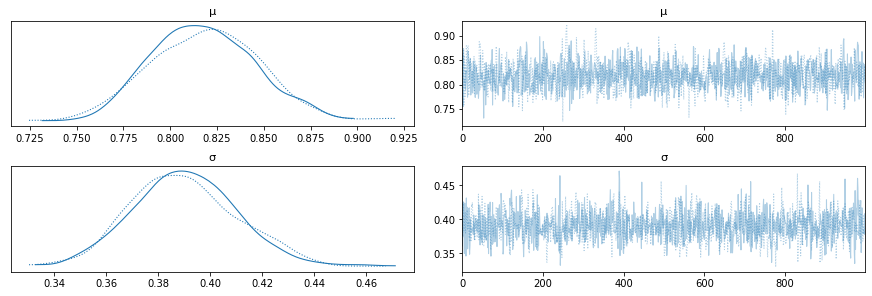

In [ ]:
az.plot_trace(trace_g)

/usr/local/lib/python3.7/dist-packages/arviz/plots/jointplot.py:144: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/utils.py:409: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_cov" failed type inference due to: Untyped global name '_dot': cannot determine Numba type of <class 'arviz.utils.maybe_numba_fn'>

File "../usr/local/lib/python3.7/dist-packages/arviz/utils.py", line 421:
def _cov(data):
    <source elided>
        x -= avg[:, None]
        prod = _dot(x

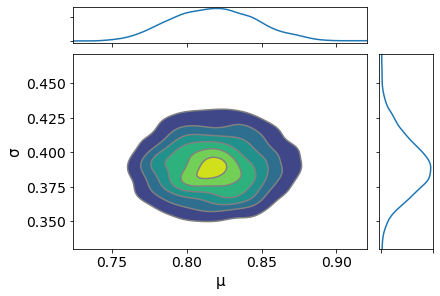

In [ ]:
az.plot_joint(trace_g, kind='kde', fill_last=False);

In [ ]:
az.summary(trace_g)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
μ  0.818  0.028   0.769    0.874      0.001    0.001    1448.0    1029.0    1.0
σ  0.390  0.021   0.353    0.429      0.001    0.000    1520.0    1228.0    1.0

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdefea84fd0>,
      dtype=object)

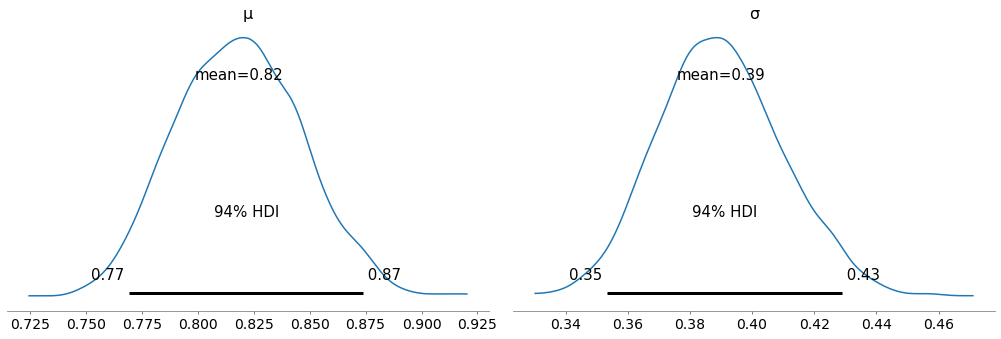

In [ ]:
az.plot_posterior(trace_g)

In [ ]:
ppc = pm.sample_posterior_predictive(trace_g, samples=1000, model=model_g)
np.asarray(ppc['y']).shape

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


(1000, 203)

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'mean(x)'),
 Text(0.5, 1.0, 'Posterior predictive of the mean')]

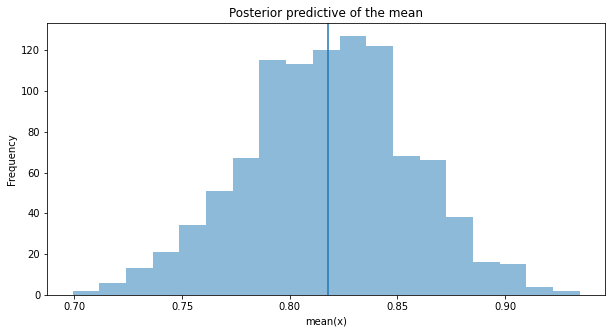

In [ ]:
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['y']], bins=19, alpha=0.5)
ax.axvline(df_undrup_final['DEATH'].mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')

#Bayesian Network

In [ ]:
pip install pybbn

  Created wheel for pybbn: filename=pybbn-3.2.1-py3-none-any.whl size=39726 sha256=64f0b127a3bc15b2436707de8ab65053e05e89bf97356b36238bfe2e354db8d8
  Stored in directory: /root/.cache/pip/wheels/a8/64/55/b52530d41fe7c9ae501ddd7c06f3122ceb5f15921680f0371b
Successfully built pybbn


In [ ]:
import networkx as nx # for drawing graphs

# for creating Bayesian Belief Networks (BBN)
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [ ]:
# This function helps to calculate probability distribution, which goes into BBN (note, can handle up to 2 parents)
def probs(data, child, parent1=None, parent2=None, parent3=None, parent4=None, parent5=None):
    # Initialize empty list
    prob=[]
    if parent1==None:
        # Calculate probabilities
        prob=data[child].value_counts(normalize=True, sort=False).sort_index().tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Work out the bands present in the parent variable
                bands=data[parent1].value_counts(sort=False).sort_index().index.tolist()
                # Caclucate probabilities
                for val in bands:
                    temp=data[data[parent1]==val][child].value_counts(normalize=True).sort_index().tolist()
                    prob=prob+temp
            elif parent2!=None:
                if parent3==None:    
                  # Work out the bands present in the parent variable
                  bands1=data[parent1].value_counts(sort=False).sort_index().index.tolist()
                  bands2=data[parent2].value_counts(sort=False).sort_index().index.tolist()
                  # Caclucate probabilities
                  for val1 in bands1:
                      for val2 in bands2:
                          #print(val1)
                          #print(val2)
                          temp=data[(data[parent1]==val1) & (data[parent2]==val2)][child].value_counts(normalize=True).sort_index().tolist()
                          prob=prob+temp
                elif parent3!=None:
                    if parent4==None:
                      bands1=data[parent1].value_counts(sort=False).sort_index().index.tolist()
                      bands2=data[parent2].value_counts(sort=False).sort_index().index.tolist()
                      bands3=data[parent3].value_counts(sort=False).sort_index().index.tolist()
                      # Caclucate probabilities
                      for val1 in bands1:
                          for val2 in bands2:
                              for val3 in bands3:
                                  temp=data[(data[parent1]==val1) & (data[parent2]==val2) & (data[parent3]==val3)][child].value_counts(normalize=True).sort_index().tolist()
                                  prob=prob+temp
                    elif parent4!=None:
                        if parent5==None:
                            bands1=data[parent1].value_counts(sort=False).sort_index().index.tolist()
                            bands2=data[parent2].value_counts(sort=False).sort_index().index.tolist()
                            bands3=data[parent3].value_counts(sort=False).sort_index().index.tolist()
                            bands4=data[parent4].value_counts(sort=False).sort_index().index.tolist()
                            # Caclucate probabilities
                            for val1 in bands1:
                                for val2 in bands2:
                                    for val3 in bands3:
                                        for val4 in bands4:
                                            temp=data[(data[parent1]==val1) & (data[parent2]==val2) & (data[parent3]==val3) & (data[parent4]==val4)][child].value_counts(normalize=True).sort_index().tolist()
                                            prob=prob+temp
                        else:
                            bands1=data[parent1].value_counts(sort=False).sort_index().index.tolist()
                            bands2=data[parent2].value_counts(sort=False).sort_index().index.tolist()
                            bands3=data[parent3].value_counts(sort=False).sort_index().index.tolist()
                            bands4=data[parent4].value_counts(sort=False).sort_index().index.tolist()
                            bands5=data[parent5].value_counts(sort=False).sort_index().index.tolist()
                      # Caclucate probabilities
                            for val1 in bands1:
                                for val2 in bands2:
                                    for val3 in band3:
                                        for val4 in bands4:
                                            for val5 in bands5:
                                                temp=data[(data[parent1]==val1) & (data[parent2]==val2) & (data[parent3]==val3) & (data[parent4]==val4) & (data[parent5]==val5)][child].value_counts(normalize=True).sort_index().tolist()
                                                prob=prob+temp

    else: print("Error in Probability Frequency Calculations")
    
    if (child != None) & (parent1 == None) & (parent2 == None):
      i = len(prob)
      while i != len(data[child].unique()):
        prob.extend([0])
        i+=1
    
    if (parent1 != None) & (parent2 == None):
      i = len(prob)
      while i != len(data[child].unique()) * len(data[parent1].unique()): 
        prob.extend([0]) 
        i+=1

    if (parent1 != None) & (parent2 != None):
      i = len(prob)
      while i != len(data[child].unique()) * len(data[parent1].unique()) * len(data[parent2].unique()):
        prob.extend([0])
        i+=1
    return prob  

In [ ]:
probs(df_undrup_final, child = 'CARDIAC ARREST', parent1='INTENSIVE CARE', parent2='RESUSCITATION')

[0.9318181818181818,
 0.06818181818181818,
 0.5384615384615384,
 0.46153846153846156,
 0.8333333333333334,
 0.16666666666666666,
 1.0,
 0]

In [ ]:
df_undrup_final['DYSPNOEA'].unique()

array([0, 1])

In [ ]:
#df[df['VAERS ID Code'] == max_symp(symp_len_alive)].Symptoms.unique()

In [ ]:
# Create nodes by using our earlier function to automatically calculate probabilities
AGE = BbnNode(Variable(0, 'AGE', df_undrup_final.Age.unique()), probs(df_undrup_final, child = 'Age'))
DY = BbnNode(Variable(1, 'DYSPNOEA', df_undrup_final['DYSPNOEA'].map(str).unique()), probs(df_undrup_final, child='DYSPNOEA', parent1= 'PNEUMONIA'))
PN = BbnNode(Variable(2, 'PNEUMONIA', df_undrup_final['PNEUMONIA'].map(str).unique()), probs(df_undrup_final, child='PNEUMONIA', parent1='COVID-19'))
DT = BbnNode(Variable(3, 'DEATH', df_undrup_final['DEATH'].map(str).unique()), probs(df_undrup_final, child='DEATH', parent1='DYSPNOEA', parent2 = 'CARDIAC ARREST'))
SEX = BbnNode(Variable(4, 'SEX', df_undrup_final.Sex.unique()), probs(df_undrup_final, child = 'Sex'))
COV = BbnNode(Variable(5, 'COVID-19', df_undrup_final['COVID-19'].map(str).unique()), probs(df_undrup_final, child = 'COVID-19', parent1='Sex', parent2='Age'))
ICU = BbnNode(Variable(6, 'INTENSIVE CARE', df_undrup_final['INTENSIVE CARE'].map(str).unique()), probs(df_undrup_final, child = 'INTENSIVE CARE', parent1='UNRESPONSIVE TO STIMULI'))
CA = BbnNode(Variable(7, 'CARDIAC ARREST', df_undrup_final['CARDIAC ARREST'].map(str).unique()), probs(df_undrup_final, child = 'CARDIAC ARREST', parent1='INTENSIVE CARE', parent2='RESUSCITATION'))
RES = BbnNode(Variable(8, 'RESUSCITATION', df_undrup_final['RESUSCITATION'].map(str).unique()), probs(df_undrup_final, child = 'RESUSCITATION'))
UNRES = BbnNode(Variable(9, 'UNRESPONSIVE TO STIMULI', df_undrup_final['UNRESPONSIVE TO STIMULI'].map(str).unique()), probs(df_undrup_final, child = 'UNRESPONSIVE TO STIMULI'))


# Create Network
bbn = Bbn() \
    .add_node(AGE) \
    .add_node(SEX) \
    .add_node(COV) \
    .add_node(ICU) \
    .add_node(RES) \
    .add_node(UNRES) \
    .add_node(PN) \
    .add_node(DY) \
    .add_node(CA) \
    .add_node(DT) \
    .add_edge(Edge(SEX, COV, EdgeType.DIRECTED)) \
    .add_edge(Edge(AGE, COV, EdgeType.DIRECTED)) \
    .add_edge(Edge(UNRES, ICU, EdgeType.DIRECTED)) \
    .add_edge(Edge(ICU, CA, EdgeType.DIRECTED)) \
    .add_edge(Edge(RES, CA, EdgeType.DIRECTED)) \
    .add_edge(Edge(COV, PN, EdgeType.DIRECTED)) \
    .add_edge(Edge(PN, DY, EdgeType.DIRECTED))\
    .add_edge(Edge(CA, DT, EdgeType.DIRECTED))\
    .add_edge(Edge(DY, DT, EdgeType.DIRECTED))

# Convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

In [ ]:
# Set node positions
#pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 0.5), 3: (0, -1), 4:(1,1)}

# Set options for graph looks
#options = {
#    "font_size": 12,
#    "node_size": 4000,
#    "node_color": "white",
#    "edgecolors": "black",
#    "edge_color": "red",
#   "linewidths": 5,
#    "width": 5,}
    
# Generate graph
#n, d = bbn.to_nx_graph()
#nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
#ax = plt.gca()
#ax.margins(0.10)
#plt.axis("off")
#plt.show()

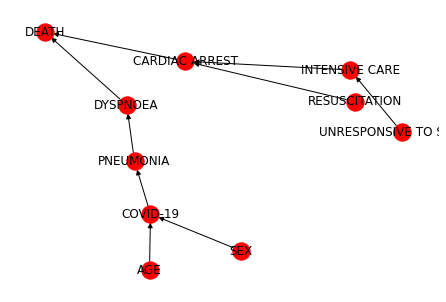

In [ ]:
import networkx as nx
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, node_color='r', alpha=1.0)

In [ ]:
# Define a function for printing marginal probabilities
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
        
# Use the above function to print marginal probabilities
print_probs()

Node: 6|INTENSIVE CARE|0,1
Values:
6=0|0.93103
6=1|0.06897
----------------
Node: 9|UNRESPONSIVE TO STIMULI|0,1
Values:
9=0|0.88177
9=1|0.11823
----------------
Node: 1|DYSPNOEA|0,1
Values:
1=0|0.84113
1=1|0.15887
----------------
Node: 7|CARDIAC ARREST|0,1
Values:
7=0|0.89881
7=1|0.10119
----------------
Node: 3|DEATH|1,0
Values:
3=1|0.18136
3=0|0.81864
----------------
Node: 8|RESUSCITATION|0,1
Values:
8=0|0.92611
8=1|0.07389
----------------
Node: 2|PNEUMONIA|0,1
Values:
2=0|0.95323
2=1|0.04677
----------------
Node: 5|COVID-19|0,1
Values:
5=0|0.68116
5=1|0.31884
----------------
Node: 4|SEX|Male,Female
Values:
4=Male|0.54299
4=Female|0.45701
----------------
Node: 0|AGE|80+ years,65-79 years,30-39 years,40-49 years,60-64 years,50-59 years,18-29 years
Values:
0=80+ years|0.04364
0=65-79 years|0.05788
0=30-39 years|0.26316
0=40-49 years|0.20095
0=60-64 years|0.20839
0=50-59 years|0.22599
0=18-29 years|0.00000
----------------


In [ ]:
# print the posterior probabilities
for node, posteriors in join_tree.get_posteriors().items():
 p = ', '.join([f'{val}={prob:.5f}' for val, prob in posteriors.items()])
 print(f'{node} : {p}')

INTENSIVE CARE : 0=0.93103, 1=0.06897
UNRESPONSIVE TO STIMULI : 0=0.88177, 1=0.11823
DYSPNOEA : 0=0.84113, 1=0.15887
CARDIAC ARREST : 0=0.89881, 1=0.10119
DEATH : 1=0.18136, 0=0.81864
RESUSCITATION : 0=0.92611, 1=0.07389
PNEUMONIA : 0=0.95323, 1=0.04677
COVID-19 : 0=0.68116, 1=0.31884
SEX : Male=0.54299, Female=0.45701
AGE : 80+ years=0.04364, 65-79 years=0.05788, 30-39 years=0.26316, 40-49 years=0.20095, 60-64 years=0.20839, 50-59 years=0.22599, 18-29 years=0.00000


In [ ]:
# To add evidence of events that happened so probability distribution can be recalculated
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
# Use above function to add evidence
evidence('ev1','SEX','Male', 1.0)
evidence('ev1','AGE','80+ years', 1.0)
#evidence('ev1','INTENSIVE CARE','0', 1.0)
evidence('ev1','UNRESPONSIVE TO STIMULI','1', 1.0)
#evidence('ev1','RESUSCITATION','0', 1.0)
#evidence('ev1','CARDIAC ARREST','0', 1.0)
#evidence('ev1','DYSPNOEA','0', 1.0)
evidence('ev1','COVID-19','1', 1.0)
#evidence('ev1','PNEUMONIA','1', 1.0)

# Print marginal probabilities
print_probs()

Node: 6|INTENSIVE CARE|0,1
Values:
6=0|0.95833
6=1|0.04167
----------------
Node: 9|UNRESPONSIVE TO STIMULI|0,1
Values:
9=0|0.00000
9=1|1.00000
----------------
Node: 1|DYSPNOEA|0,1
Values:
1=0|0.82208
1=1|0.17792
----------------
Node: 7|CARDIAC ARREST|0,1
Values:
7=0|0.90037
7=1|0.09963
----------------
Node: 3|DEATH|1,0
Values:
3=1|0.17914
3=0|0.82086
----------------
Node: 8|RESUSCITATION|0,1
Values:
8=0|0.92611
8=1|0.07389
----------------
Node: 2|PNEUMONIA|0,1
Values:
2=0|0.90000
2=1|0.10000
----------------
Node: 5|COVID-19|0,1
Values:
5=0|0.00000
5=1|1.00000
----------------
Node: 4|SEX|Male,Female
Values:
4=Male|1.00000
4=Female|0.00000
----------------
Node: 0|AGE|80+ years,65-79 years,30-39 years,40-49 years,60-64 years,50-59 years,18-29 years
Values:
0=80+ years|1.00000
0=65-79 years|0.00000
0=30-39 years|0.00000
0=40-49 years|0.00000
0=60-64 years|0.00000
0=50-59 years|0.00000
0=18-29 years|0.00000
----------------


In [ ]:
df[df['VAERS ID Code'] == max_symp(symp_len_alive)].Symptoms.unique()

array(['ALANINE AMINOTRANSFERASE INCREASED',
       'ALBUMIN GLOBULIN RATIO NORMAL', 'ANION GAP NORMAL',
       'AORTIC ANEURYSM', 'ASPARTATE AMINOTRANSFERASE INCREASED',
       'ATELECTASIS', 'BACTERIAL TEST POSITIVE', 'BASE EXCESS NEGATIVE',
       'BASOPHIL COUNT DECREASED', 'BASOPHIL PERCENTAGE DECREASED',
       'BILIRUBIN URINE', 'BLOOD ALKALINE PHOSPHATASE INCREASED',
       'BLOOD BICARBONATE NORMAL', 'BLOOD BILIRUBIN INCREASED',
       'BLOOD CALCIUM DECREASED', 'BLOOD CHLORIDE INCREASED',
       'BLOOD CREATININE INCREASED', 'BLOOD GASES',
       'BLOOD GLUCOSE DECREASED', 'BLOOD LACTIC ACID',
       'BLOOD MAGNESIUM INCREASED', 'BLOOD PH DECREASED',
       'BLOOD POTASSIUM NORMAL', 'BLOOD SODIUM INCREASED',
       'BLOOD UREA INCREASED', 'BLOOD UREA NITROGEN/CREATININE RATIO',
       'BLOOD URINE PRESENT', 'CALCIUM IONISED NORMAL',
       'CARBON DIOXIDE DECREASED', 'CARDIAC ARREST',
       'CHEST X-RAY ABNORMAL', 'DROOLING', 'ELECTROCARDIOGRAM',
       'ELECTROENCEPHALOGRAM

In [ ]:
# Create nodes by using our earlier function to automatically calculate probabilities
AGE = BbnNode(Variable(0, 'AGE', df_undrup_final.Age.unique()), probs(df_undrup_final, child = 'Age'))
#IL = BbnNode(Variable(1, 'ILLNESS', ['0','1']), probs(df_undrup_final, child='ILLNESS'))
#PNT = BbnNode(Variable(2, 'PNEUMONITIS', ['0','1']), probs(df_undrup_final, child='PNEUMONITIS'))
DT = BbnNode(Variable(3, 'DEATH', ['0', '1']), probs(df_undrup_final, child='DEATH', parent1='Sex', parent2='Age'))
SEX = BbnNode(Variable(4, 'SEX', df_undrup_final.Sex.unique()), probs(df_undrup_final, child = 'Sex'))
#GD = BbnNode(Variable(5, 'GAIT DISTURBANCE', ['0', '1']), probs(df_undrup_final, child = 'GAIT DISTURBANCE', parent1='ENCEPHALOPATHY'))
#COMA = BbnNode(Variable(6, 'COMA', ['0', '1']), probs(df_undrup_final, child = 'COMA'))
#CA = BbnNode(Variable(7, 'CARDIAC ARREST', ['0', '1']), probs(df_undrup_final, child = 'CARDIAC ARREST', parent1='GAIT DISTURBANCE'))
#EN = BbnNode(Variable(8, 'ENCEPHALOPATHY', ['0', '1']), probs(df_undrup_final, child = 'ENCEPHALOPATHY'))
#GL = BbnNode(Variable(9, 'GLIOSIS', ['0', '1']), probs(df_undrup_final, child = 'GLIOSIS'))
#HYP = BbnNode(Variable(10, 'HYPOKALAEMIA', ['0', '1']), probs(df_undrup_final, child = 'HYPOKALAEMIA', parent1='ILLNESS'))
#HYM = BbnNode(Variable(11, 'HYPOMAGNESAEMIA', ['0', '1']), probs(df_undrup_final, child = 'HYPOMAGNESAEMIA', parent1='ILLNESS'))


# Create Network
bbn1 = Bbn() \
    .add_node(DT) \
    .add_node(SEX) \
    .add_node(AGE) \
    .add_edge(Edge(SEX, DT, EdgeType.DIRECTED)) \
    .add_edge(Edge(AGE, DT, EdgeType.DIRECTED))

# Convert the BBN to a join tree
join_tree_1 = InferenceController.apply(bbn1)

In [ ]:
# Set node positions
#pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 0.5), 3: (0, -1), 4:(1,1)}

# Set options for graph looks
#options = {
#    "font_size": 12,
#    "node_size": 4000,
#    "node_color": "white",
#    "edgecolors": "black",
#    "edge_color": "red",
#   "linewidths": 5,
#    "width": 5,}
    
# Generate graph
#n, d = bbn.to_nx_graph()
#nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
#ax = plt.gca()
#ax.margins(0.10)
#plt.axis("off")
#plt.show()

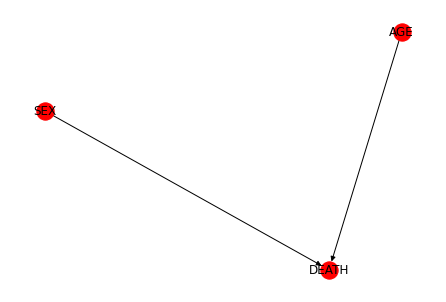

In [ ]:
import networkx as nx
n, d = bbn1.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, node_color='r', alpha=1.0)

In [ ]:
# Define a function for printing marginal probabilities
def print_probs():
    for node in join_tree_1.get_bbn_nodes():
        potential = join_tree_1.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
        
# Use the above function to print marginal probabilities
print_probs()

Node: 3|DEATH|0,1
Values:
3=0|0.73923
3=1|0.26077
----------------
Node: 4|SEX|Male,Female
Values:
4=Male|0.50240
4=Female|0.49760
----------------
Node: 0|AGE|80+ years,65-79 years,30-39 years,40-49 years,60-64 years,50-59 years,18-29 years
Values:
0=80+ years|0.02129
0=65-79 years|0.05469
0=30-39 years|0.12260
0=40-49 years|0.16575
0=60-64 years|0.15032
0=50-59 years|0.39048
0=18-29 years|0.09488
----------------


In [ ]:
# print the posterior probabilities
for node, posteriors in join_tree_1.get_posteriors().items():
 p = ', '.join([f'{val}={prob:.5f}' for val, prob in posteriors.items()])
 print(f'{node} : {p}')

DEATH : 0=0.73923, 1=0.26077
SEX : Male=0.50240, Female=0.49760
AGE : 80+ years=0.02129, 65-79 years=0.05469, 30-39 years=0.12260, 40-49 years=0.16575, 60-64 years=0.15032, 50-59 years=0.39048, 18-29 years=0.09488


In [ ]:
# To add evidence of events that happened so probability distribution can be recalculated
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree_1.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree_1.set_observation(ev)
    
# Use above function to add evidence
evidence('ev2','SEX','Male', 1.0)
evidence('ev3','AGE','30-39 years', 1.0)
#evidence('ev4','CARDIAC ARREST','1', 1.0)
#evidence('ev5','COMA','1', 1.0)

# Print marginal probabilities
print_probs()

Node: 3|DEATH|0,1
Values:
3=0|0.10000
3=1|0.90000
----------------
Node: 4|SEX|Male,Female
Values:
4=Male|1.00000
4=Female|0.00000
----------------
Node: 0|AGE|80+ years,65-79 years,30-39 years,40-49 years,60-64 years,50-59 years,18-29 years
Values:
0=80+ years|0.00000
0=65-79 years|0.00000
0=30-39 years|1.00000
0=40-49 years|0.00000
0=60-64 years|0.00000
0=50-59 years|0.00000
0=18-29 years|0.00000
----------------


In [ ]:
#pip install bn

In [ ]:
#import pymc3 as pm

In [ ]:
#from bn.bayesian_network import BayesianNetwork
#from bn.dag import DAG
#from bn.dag_prior import DAGPrior
#from bn.sampler import StructureMCMC
#from bn.variable import Variable

In [ ]:
#with pm.Model() as m:
    #dag = DAG(variables=[difficulty, grade, has_studied, letter, sat], adj=adj)
    #bn = BayesianNetwork('bn', dag=dag)

In [ ]:
#with m:    
    #data = pm.sample_prior_predictive(1000, random_seed=23)['bn']

In [ ]:
#with pm.Model():
    #dag = DAGPrior(
       # 'dag', variables=[difficulty, grade, has_studied, letter, sat])
 #   bn = BayesianNetwork('bn', dag=dag, observed=data)
 #   step = StructureMCMC([dag], data=data)
 #   trace = pm.sample(draws=5, tune=1, chains=1, cores=1,
 #                     step=step, random_seed=23)

In [ ]:
#best = trace['dag'][0].copy()
#best_score = -numpy.Inf
#numpy.random.seed(2)

#for i in range(100):
#    adj, score = step.random(adj)
#    if best_score < score:
#        best = adj.copy()
#        best_score = score

#Export data

In [ ]:
df_undrup_final.to_csv (r'covid-19_vaccine_Moderna_clean.csv', index = True, header=True)